Dataset Preview:
   Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0              No      

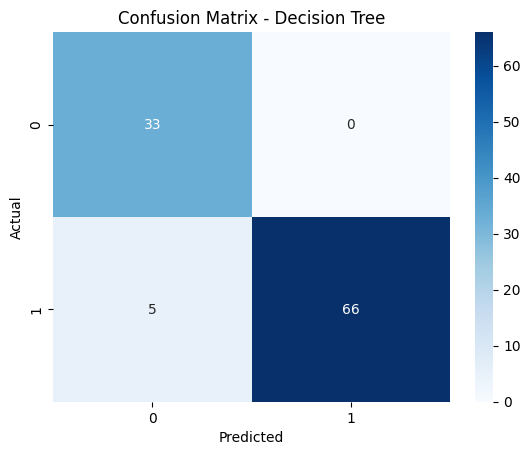


Feature Importances (Decision Tree):
Age: 0.0814
Gender: 0.1006
Polyuria: 0.4596
Polydipsia: 0.0783
sudden weight loss: 0.0000
weakness: 0.0017
Polyphagia: 0.0067
Genital thrush: 0.0245
visual blurring: 0.0000
Itching: 0.0223
Irritability: 0.0351
delayed healing: 0.0680
partial paresis: 0.0099
muscle stiffness: 0.0473
Alopecia: 0.0525
Obesity: 0.0121

Actual vs Predicted (Decision Tree):
     Actual  Predicted (Decision Tree)
275       0                          0
93        1                          1
6         1                          1
167       1                          1
90        1                          1


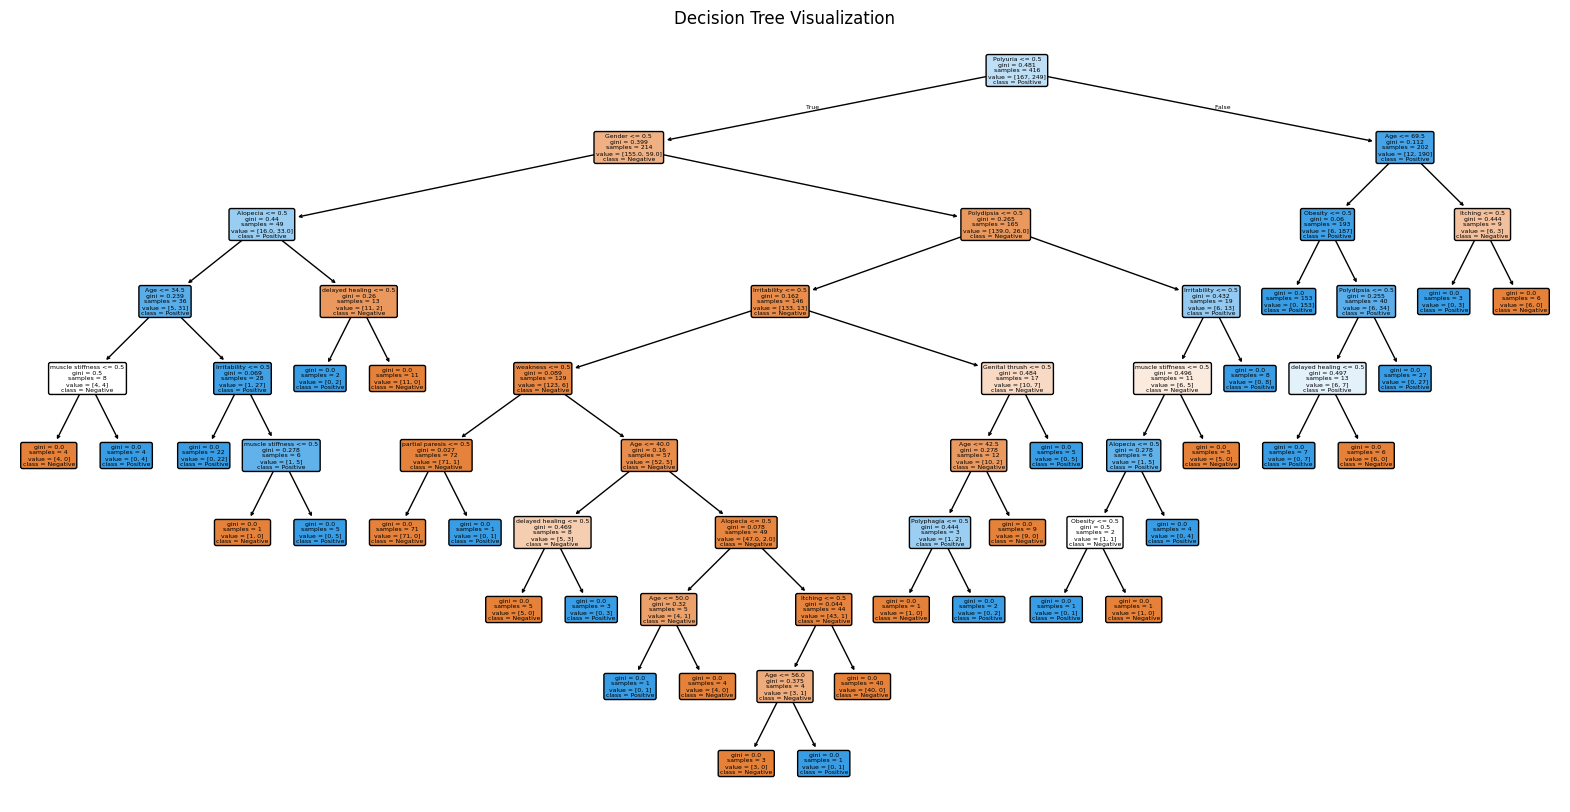

Random Forest Accuracy: 99.04%
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



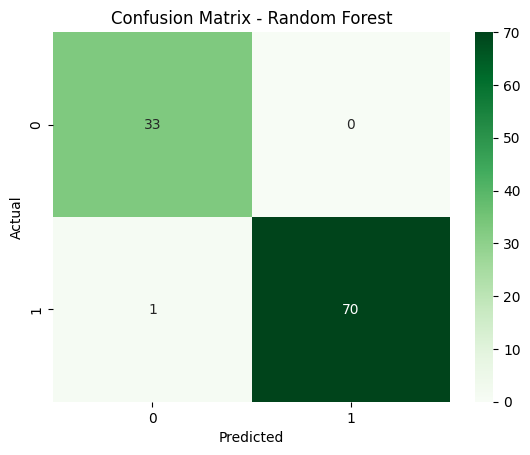


Feature Importances (Random Forest):
Age: 0.0998
Gender: 0.1034
Polyuria: 0.2348
Polydipsia: 0.1753
sudden weight loss: 0.0543
weakness: 0.0233
Polyphagia: 0.0234
Genital thrush: 0.0272
visual blurring: 0.0247
Itching: 0.0295
Irritability: 0.0435
delayed healing: 0.0321
partial paresis: 0.0484
muscle stiffness: 0.0218
Alopecia: 0.0443
Obesity: 0.0142

Actual vs Predicted (Random Forest):
     Actual  Predicted (Random Forest)
275       0                          0
93        1                          1
6         1                          1
167       1                          1
90        1                          1


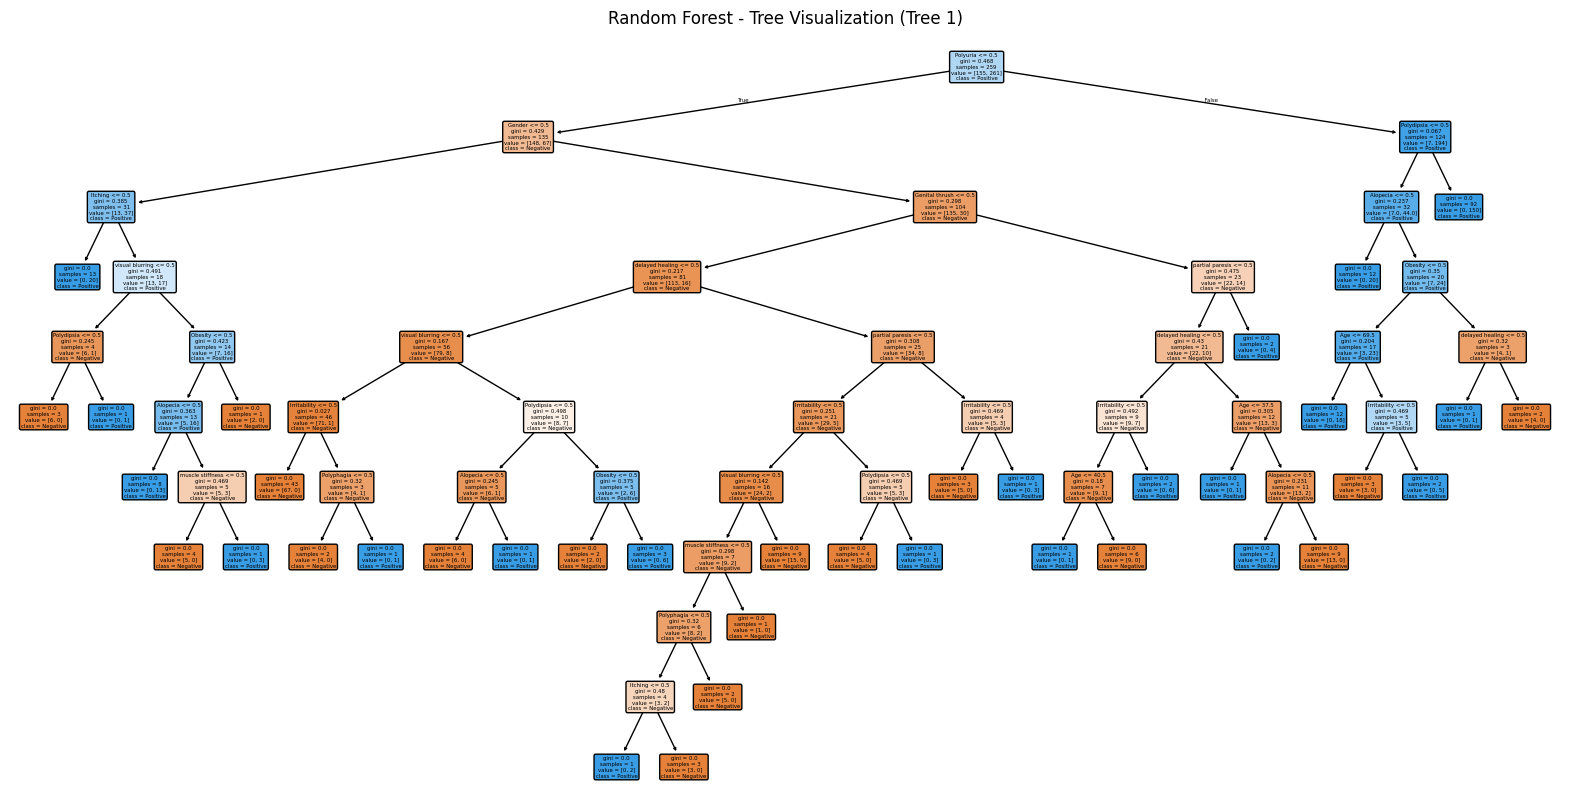


Actual vs Predicted (Comparison of Both Models):
     Actual  Predicted (Decision Tree)  Predicted (Random Forest)
275       0                          0                          0
93        1                          1                          1
6         1                          1                          1
167       1                          1                          1
90        1                          1                          1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('diabetes.csv')

# Display the first few rows to understand the structure
print("Dataset Preview:")
print(data.head())

# Encode categorical columns to numerical values
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Split features and target variable
X = data.drop('class', axis=1)  # Features (all columns except 'class')
y = data['class']  # Target variable (0: Negative, 1: Positive)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Decision Tree Model ###

# Initialize Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Predict using the test data
y_pred_tree = decision_tree_model.predict(X_test)

# Calculate accuracy
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree Accuracy: {accuracy_tree * 100:.2f}%")

# Display classification report
print("Classification Report (Decision Tree):\n", classification_report(y_test, y_pred_tree))

# Display confusion matrix
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display feature importance for interpretability
feature_importance_tree = decision_tree_model.feature_importances_
print("\nFeature Importances (Decision Tree):")
for feature, importance in zip(X.columns, feature_importance_tree):
    print(f"{feature}: {importance:.4f}")

# Compare Actual vs Predicted for Decision Tree
comparison_tree = pd.DataFrame({'Actual': y_test, 'Predicted (Decision Tree)': y_pred_tree})
print("\nActual vs Predicted (Decision Tree):")
print(comparison_tree.head())

### Visualize the Decision Tree ###
plt.figure(figsize=(20,10))  # Adjust the figure size for better visibility
plot_tree(decision_tree_model, feature_names=X.columns, class_names=['Negative', 'Positive'], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

### Random Forest Model ###

# Initialize Random Forest Classifier with 100 trees
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Predict using the test data
y_pred_forest = random_forest_model.predict(X_test)

# Calculate accuracy
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(f"Random Forest Accuracy: {accuracy_forest * 100:.2f}%")

# Display classification report
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_forest))

# Display confusion matrix
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
sns.heatmap(conf_matrix_forest, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Display feature importance for interpretability
feature_importance_forest = random_forest_model.feature_importances_
print("\nFeature Importances (Random Forest):")
for feature, importance in zip(X.columns, feature_importance_forest):
    print(f"{feature}: {importance:.4f}")

# Compare Actual vs Predicted for Random Forest
comparison_forest = pd.DataFrame({'Actual': y_test, 'Predicted (Random Forest)': y_pred_forest})
print("\nActual vs Predicted (Random Forest):")
print(comparison_forest.head())

### Visualize One Tree from the Random Forest ###

# Random Forest contains many trees, so we'll visualize one of them
plt.figure(figsize=(20,10))
single_tree = random_forest_model.estimators_[0]  # Selecting the first tree from the forest
plot_tree(single_tree, feature_names=X.columns, class_names=['Negative', 'Positive'], filled=True, rounded=True)
plt.title('Random Forest - Tree Visualization (Tree 1)')
plt.show()

### Compare Predictions Side by Side ###
comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted (Decision Tree)': y_pred_tree,
    'Predicted (Random Forest)': y_pred_forest
})
print("\nActual vs Predicted (Comparison of Both Models):")
print(comparison.head())

